<a href="https://colab.research.google.com/github/arathy-1993/Workshop-2-Diabetes-Dataset-/blob/main/Copy_of_COMP8967_1_R_2022S_Internship_Project_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df2=pd.read_csv('./sample_data/diabetes.csv')
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X2 = df2.iloc[:,0:-1]
y2 = df2.iloc[:,-1]

print(X2.head(),'\n')
print('labels:\n',y2.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33   

labels:
 0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (6,6))
ax = fig.gca()
df2.hist(ax=ax)
plt.show()

In [5]:
from sklearn import preprocessing
s = preprocessing.MinMaxScaler()
s.fit(X2)
X_norm2 = s.transform(X2)
# X = preprocessing.normalize(X, norm='l2')
print(type(X_norm2))

<class 'numpy.ndarray'>


In [6]:
print('Before Normalization')
print(X2.head(),'\n')
print('After Normalization')
print((pd.DataFrame(X_norm2)).head())

Before Normalization
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33   

After Normalization
          0         1         2         3         4         5         6  \
0  0.352941  0.743719  0.590164  0.353535  0.000000  0.500745  0.234415   
1  0.058824  0.427136  0.540984  0.292929  0.000000  0.396423  0.116567   
2  0.470588  0.919598  0.524590  0.000000  0.000000  0.347243  0.253629   
3  0.058824  0

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
import numpy as np 
scoring = ['precision', 'recall', 'accuracy']
clf2 = KNeighborsClassifier(n_neighbors=12, metric='euclidean')
scores2 = cross_validate(clf2, X_norm2, y2,cv=5, scoring=scoring)
prec2 = np.mean(scores2['test_precision'])
rec2 = np.mean(scores2['test_recall'])
acc2 = np.mean(scores2['test_accuracy'])
print('Average precision is:' , prec2)
print('Average recall is:' , rec2)
print('Average accuracy is:' , acc2)

Average precision is: 0.7146309019885871
Average recall is: 0.47393431167016076
Average accuracy is: 0.750021220609456


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, '2-class Precision-Recall curve')

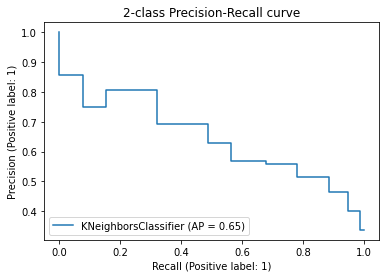

In [18]:
from sklearn.metrics import plot_precision_recall_curve
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_norm2, y2, test_size=0.3, random_state=None)
clf2.fit(X_train, y_train)
disp = plot_precision_recall_curve(clf2, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve')